In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
df = pd.read_excel('JDACS.xlsx',engine='openpyxl',sheet_name='Query result')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6398 entries, 0 to 6397
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Personal or Business  6398 non-null   object 
 1   Business Number       3064 non-null   float64
 2   Vehicle Type          6398 non-null   object 
 3   Standard or Express   6393 non-null   object 
 4   Platform              6398 non-null   object 
 5   Cancel Reason         6398 non-null   object 
 6   Cancelled by          6398 non-null   object 
 7   Placement Day         6398 non-null   float64
 8   Placement Time        6398 non-null   object 
 9   Confirmation Day      2882 non-null   float64
 10  Confirmation Time     2882 non-null   object 
 11  Cancellation Day      6398 non-null   float64
 12  Cancellation Time     6398 non-null   object 
 13  Distance (KM)         6398 non-null   float64
 14  Pickup Lat            6398 non-null   float64
 15  Pickup Long          

In [6]:
df.shape

(6398, 17)

Categorical Columns: Personal or Business, Business Number, Vehicle Type, Standard or Express, Platform, Cancel Reason, Cancelled by, Placement Day, Cancellation Day, scheduled

Numerical Columns: Placement Time, Cancellation Time, Distance (KM), Pickup Lat, Pickup Long

In [5]:
# convert categorical columns to categorical dtypes
cat_df = df.loc[:,
                ['Personal or Business','Business Number','Vehicle Type',
                 'Standard or Express','Platform','Cancel Reason',
                 'Cancelled by','Placement Day','Cancellation Day','scheduled'
                ]
               ].apply(lambda x: x.astype('category'))
cat_df.head()

,Personal or Business,Business Number,Vehicle Type,Standard or Express,Platform,Cancel Reason,Cancelled by,Placement Day,Cancellation Day,scheduled
0,Personal,NaN,Bike,Express,android,No driver has been allocated to my request.,Customer,1.0,1.0,OnDemAND
1,Personal,NaN,Bike,Express,android,My order is not ready.,Customer,1.0,1.0,OnDemAND
2,Business,20680.0,Bike,Express,android,I placed the wrong locations.,Customer,1.0,1.0,OnDemAND
3,Personal,NaN,Bike,Express,android,My order is not ready.,Customer,1.0,1.0,OnDemAND
4,Personal,NaN,Bike,Standard,ios,No Partner,Staff,1.0,1.0,OnDemAND


In [7]:
df.describe()

,Business Number,Placement Day,Confirmation Day,Cancellation Day,Distance (KM),Pickup Lat,Pickup Long
count,3064.000000,6398.000000,2882.000000,6398.000000,6398.000000,6398.000000,6398.000000
mean,28831.983029,3.634730,3.445871,3.673648,13.926071,-1.287770,36.814942
std,10932.772820,1.709081,1.623762,1.712791,45.293385,0.067069,0.113844
min,10036.000000,1.000000,1.000000,1.000000,0.000000,-2.390920,32.628902
25%,20680.000000,2.000000,2.000000,2.000000,5.000000,-1.315784,36.786009
50%,29230.000000,4.000000,3.000000,4.000000,9.000000,-1.291189,36.812909
75%,32692.000000,5.000000,5.000000,5.000000,16.000000,-1.263968,36.843230
max,62392.000000,7.000000,7.000000,7.000000,2061.000000,0.551064,40.689788


In [8]:
df.columns

Index(['Personal or Business', 'Business Number', 'Vehicle Type',
       'Standard or Express', 'Platform', 'Cancel Reason', 'Cancelled by',
       'Placement Day', 'Placement Time', 'Confirmation Day',
       'Confirmation Time', 'Cancellation Day', 'Cancellation Time',
       'Distance (KM)', 'Pickup Lat', 'Pickup Long', 'scheduled'],
      dtype='object')

In [7]:
df[df['Business Number'] == 10036.0]

,Personal or Business,Business Number,Vehicle Type,Standard or Express,Platform,Cancel Reason,Cancelled by,Placement Day,Placement Time,Confirmation Day,Confirmation Time,Cancellation Day,Cancellation Time,Distance (KM),Pickup Lat,Pickup Long,scheduled
1272,Business,10036.0,Bike,NaN,desktop,No driver has been allocated to my request.,Customer,2.0,08:12:13,2.0,08:13:14,2.0,08:22:25,17.0,-1.297723,36.783937,OnDemAND
1870,Business,10036.0,Bike,NaN,desktop,I placed the wrong locations.,Customer,2.0,09:38:28,NaN,NaN,2.0,09:38:52,5.0,-1.299734,36.766313,OnDemAND
2806,Business,10036.0,Bike,NaN,desktop,My order is not ready.,Customer,3.0,08:02:01,3.0,08:02:30,3.0,08:08:08,4.0,-1.264832,36.787344,OnDemAND
3047,Business,10036.0,Bike,NaN,desktop,My order is not ready.,Customer,4.0,16:21:34,4.0,16:25:08,4.0,16:51:49,9.0,-1.298123,36.783337,OnDemAND
3526,Business,10036.0,Bike,Standard,android,My order is not ready.,Customer,4.0,14:27:34,NaN,NaN,4.0,14:41:51,15.0,-1.298123,36.778537,OnDemAND
4325,Business,10036.0,Bike,NaN,desktop,No driver has been allocated to my request.,Customer,5.0,15:18:10,NaN,NaN,5.0,15:18:25,4.0,-1.289444,36.780726,OnDemAND


In [12]:
df[df['Standard or Express'].isna()]

,Personal or Business,Business Number,Vehicle Type,Standard or Express,Platform,Cancel Reason,Cancelled by,Placement Day,Placement Time,Confirmation Day,Confirmation Time,Cancellation Day,Cancellation Time,Distance (KM),Pickup Lat,Pickup Long,scheduled
1272,Business,10036.0,Bike,NaN,desktop,No driver has been allocated to my request.,Customer,2.0,08:12:13,2.0,08:13:14,2.0,08:22:25,17.0,-1.297723,36.783937,OnDemAND
1870,Business,10036.0,Bike,NaN,desktop,I placed the wrong locations.,Customer,2.0,09:38:28,NaN,NaN,2.0,09:38:52,5.0,-1.299734,36.766313,OnDemAND
2806,Business,10036.0,Bike,NaN,desktop,My order is not ready.,Customer,3.0,08:02:01,3.0,08:02:30,3.0,08:08:08,4.0,-1.264832,36.787344,OnDemAND
3047,Business,10036.0,Bike,NaN,desktop,My order is not ready.,Customer,4.0,16:21:34,4.0,16:25:08,4.0,16:51:49,9.0,-1.298123,36.783337,OnDemAND
4325,Business,10036.0,Bike,NaN,desktop,No driver has been allocated to my request.,Customer,5.0,15:18:10,NaN,NaN,5.0,15:18:25,4.0,-1.289444,36.780726,OnDemAND


In [13]:
# distance km columns may have some outliers
df['Distance (KM)'].nlargest(10)

5507    2061.0
5524    1731.0
4263    1600.0
6112    1111.0
4305     562.0
5500     504.0
5495     347.0
344      264.0
356      264.0
4343     255.0
Name: Distance (KM), dtype: float64

In [6]:
df[df['Distance (KM)'] > 500].sort_values(by='Distance (KM)', ascending=False)

,Personal or Business,Business Number,Vehicle Type,Standard or Express,Platform,Cancel Reason,Cancelled by,Placement Day,Placement Time,Confirmation Day,Confirmation Time,Cancellation Day,Cancellation Time,Distance (KM),Pickup Lat,Pickup Long,scheduled
5507,Personal,NaN,Bike,Express,android,The driver is too far away.,Customer,6.0,21:21:49,6.0,21:21:55,6.0,21:25:04,2061.0,-1.275599,36.808875,OnDemAND
5524,Personal,NaN,Bike,Express,android,The driver is too far away.,Customer,6.0,17:04:31,6.0,17:06:13,6.0,17:06:57,1731.0,-1.262857,36.785555,OnDemAND
4263,Personal,NaN,Bike,Express,android,The driver is too far away.,Customer,5.0,13:17:13,5.0,13:17:19,5.0,13:17:29,1600.0,-1.264546,36.791727,OnDemAND
6112,Personal,NaN,Bike,Express,android,No driver has been allocated to my request.,Customer,7.0,23:37:45,7.0,23:39:08,7.0,23:39:16,1111.0,-1.282392,36.747675,OnDemAND
4305,Personal,NaN,Bike,Express,android,My order is not ready.,Customer,5.0,13:20:14,5.0,13:20:34,5.0,13:20:39,562.0,-1.255246,36.792627,OnDemAND
5500,Personal,NaN,Bike,Express,android,The driver is too far away.,Customer,6.0,17:02:02,6.0,17:02:27,6.0,17:02:47,504.0,-1.260646,36.795327,OnDemAND


In [22]:
df['Cancel Reason'].value_counts(normalize=True)

No driver has been allocated to my request.    0.277430
No Partner                                     0.202094
My order is not ready.                         0.189747
I placed the wrong locations.                  0.174117
The driver is too far away.                    0.092842
Customer error                                 0.052673
Delay                                          0.011097
Name: Cancel Reason, dtype: float64

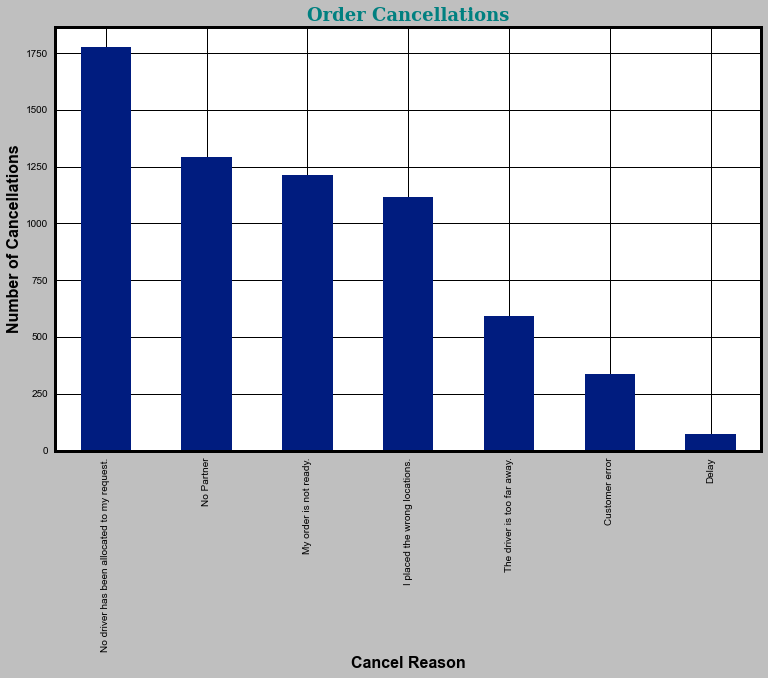

In [137]:
plt.style.use('seaborn-dark-palette')
fig = plt.figure(figsize=(10,6))
font = {'family': 'serif',
        'color':  'teal',
        'weight': 'bold',
        'size': 18,
        }

ax = df.groupby('Cancel Reason')['Cancelled by'].count().sort_values(ascending=False).plot.bar(ylim=0)
ax.set_title('Order Cancellations',fontdict=font)
ax.set_ylabel('Number of Cancellations',fontsize=16,fontweight='bold')
ax.set_xlabel('Cancel Reason',fontsize=16,fontweight='bold')
fig1=plt.gcf()
fig1.savefig('cancel_reason_sorted.png',dpi=100)
plt.show()


In [7]:
df_cancel_grp = df.groupby(['Cancel Reason'])

In [8]:
df_cancel_grp['Distance (KM)'].mean()

Cancel Reason
Customer error                                  8.626113
Delay                                          11.126761
I placed the wrong locations.                  15.113106
My order is not ready.                         13.088138
No Partner                                     10.560712
No driver has been allocated to my request.    13.594930
The driver is too far away.                    25.069024
Name: Distance (KM), dtype: float64

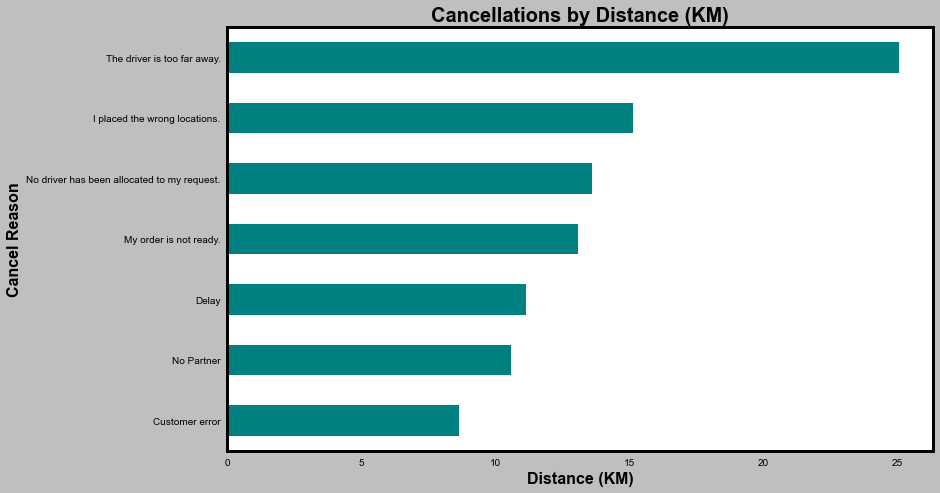

In [134]:
dist_grp = df_cancel_grp['Distance (KM)'].mean().sort_values()

plt.style.use('seaborn-pastel')
fig = plt.figure(figsize=(10,6))
ax = dist_grp.plot.barh(color='teal')
ax.set_title('Cancellations by Distance (KM)',fontsize=20,fontweight='bold')
ax.set_ylabel('Cancel Reason',fontsize=16,fontweight='bold')
ax.set_xlabel('Distance (KM)',fontsize=16,fontweight='bold')
plt.grid(False)
plt.savefig('cancellations_distance.jpg')
#plt.show()


In [27]:
df_cancel_grp['scheduled'].value_counts(normalize=True)

Cancel Reason                                scheduled
Customer error                               OnDemAND     0.952522
                                             Scheduled    0.047478
Delay                                        OnDemAND     0.845070
                                             Scheduled    0.154930
I placed the wrong locations.                OnDemAND     0.970377
                                             Scheduled    0.029623
My order is not ready.                       OnDemAND     0.972817
                                             Scheduled    0.027183
No Partner                                   OnDemAND     0.917247
                                             Scheduled    0.082753
No driver has been allocated to my request.  OnDemAND     0.978028
                                             Scheduled    0.021972
The driver is too far away.                  OnDemAND     0.986532
                                             Scheduled    0.013468
Name: s

In [32]:
df['scheduled'].value_counts(normalize=True) # 96 percent of cancellations are for OnDemAND orders

OnDemAND     0.961394
Scheduled    0.038606
Name: scheduled, dtype: float64

In [13]:
# group by scheduled to see how the scheduled column affects cancellation
df_scheduled_grp = df.groupby(['scheduled'])

In [19]:
df_scheduled_grp['Cancel Reason'].value_counts(normalize=True)

scheduled  Cancel Reason                              
OnDemAND   No driver has been allocated to my request.    0.282231
           No Partner                                     0.192814
           My order is not ready.                         0.192001
           I placed the wrong locations.                  0.175744
           The driver is too far away.                    0.095269
           Customer error                                 0.052187
           Delay                                          0.009755
Scheduled  No Partner                                     0.433198
           No driver has been allocated to my request.    0.157895
           I placed the wrong locations.                  0.133603
           My order is not ready.                         0.133603
           Customer error                                 0.064777
           Delay                                          0.044534
           The driver is too far away.                    0.032389
Name: C

In [37]:
df[['Personal or Business']].value_counts(normalize=True)

Personal or Business
Personal                0.5211
Business                0.4789
dtype: float64

In [39]:
df['Standard or Express'].value_counts(normalize=True) # 63% of cancellations are from Express orders

Express     0.627718
Standard    0.372282
Name: Standard or Express, dtype: float64

In [40]:
df_std_xprs_grp = df.groupby(['Standard or Express'])

In [43]:
df_std_xprs_grp['Cancel Reason'].value_counts(normalize=True)

Standard or Express  Cancel Reason                              
Express              No driver has been allocated to my request.    0.244206
                     My order is not ready.                         0.212808
                     No Partner                                     0.201844
                     I placed the wrong locations.                  0.193870
                     The driver is too far away.                    0.078246
                     Customer error                                 0.061052
                     Delay                                          0.007974
Standard             No driver has been allocated to my request.    0.333193
                     No Partner                                     0.202941
                     My order is not ready.                         0.150420
                     I placed the wrong locations.                  0.140756
                     The driver is too far away.                    0.117647
           

In [169]:
df.groupby(['Platform'])['Cancel Reason'].value_counts(normalize=True)

Platform  Cancel Reason                              
API       No Partner                                     0.718220
          Customer error                                 0.273305
          Delay                                          0.006356
          No driver has been allocated to my request.    0.002119
android   No driver has been allocated to my request.    0.306346
          I placed the wrong locations.                  0.188913
          My order is not ready.                         0.183807
          The driver is too far away.                    0.171408
          No Partner                                     0.117797
          Customer error                                 0.025164
          Delay                                          0.006565
desktop   No driver has been allocated to my request.    0.284457
          My order is not ready.                         0.234604
          No Partner                                     0.216590
          I placed the

In [45]:
df['Cancelled by'].value_counts(normalize=True)

Customer    0.734136
Staff       0.265864
Name: Cancelled by, dtype: float64

In [46]:
df_cancel_by_grp = df.groupby(['Cancelled by'])

In [48]:
df_cancel_by_grp['Cancel Reason'].value_counts()

Cancelled by  Cancel Reason                              
Customer      No driver has been allocated to my request.    1775
              My order is not ready.                         1214
              I placed the wrong locations.                  1114
              The driver is too far away.                     594
Staff         No Partner                                     1293
              Customer error                                  337
              Delay                                            71
Name: Cancel Reason, dtype: int64

In [24]:
cancel_table = pd.pivot_table(data=df[['Cancelled by','Cancel Reason']].groupby(['Cancelled by'])['Cancel Reason'].value_counts().reset_index(name='count'),index=['Cancelled by'], columns='Cancel Reason',fill_value=0)
cancel_table

count                                      \
Cancel Reason Customer error Delay I placed the wrong locations.   
Cancelled by                                                       
Customer                   0     0                          1114   
Staff                    337    71                             0   

                                                 \
Cancel Reason My order is not ready. No Partner   
Cancelled by                                      
Customer                        1214          0   
Staff                              0       1293   

                                                           \
Cancel Reason No driver has been allocated to my request.   
Cancelled by                                                
Customer                                             1775   
Staff                                                   0   

                                           
Cancel Reason The driver is too far away.  
Cancelled by                               
Customer                              594  
Staff                                   0

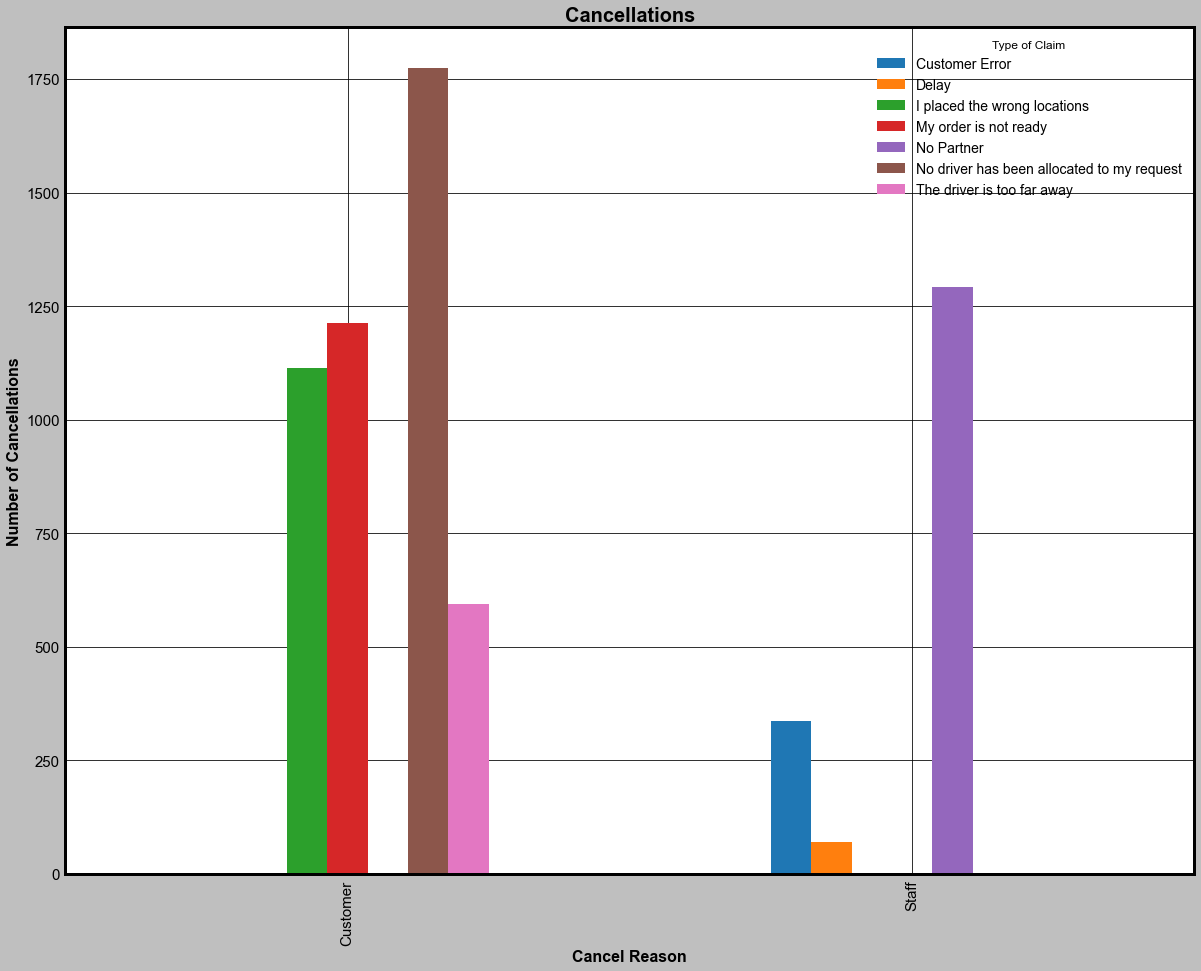

In [167]:
import matplotlib.colors as mcolors
plt.style.use('seaborn-paper')
ax = cancel_table.plot(kind='bar',figsize=(16,12),fontsize=15,color=tab_cols)

ax.set_title('Cancellations',fontsize=20,fontweight='bold')
ax.set_ylabel('Number of Cancellations',fontsize=16,fontweight='bold')
ax.set_xlabel('Cancel Reason',fontsize=16,fontweight='bold')

L=ax.legend(fontsize=14)
L.set_title('Type of Claim',prop={'size':12})
L.get_texts()[0].set_text('Customer Error')
L.get_texts()[1].set_text('Delay')
L.get_texts()[2].set_text('I placed the wrong locations')
L.get_texts()[3].set_text('My order is not ready')
L.get_texts()[4].set_text('No Partner')
L.get_texts()[5].set_text('No driver has been allocated to my request')
L.get_texts()[6].set_text('The driver is too far away')
plt.savefig('somestuff.png')

In [80]:
tab_cols = list(mcolors.TABLEAU_COLORS.values())
tab_cols.reverse()

In [52]:
### add an extra column
df['Placement Day'].value_counts(normalize=True) # orders placed on Friday have the highest rate of cancellation at 19.7%

5.0    0.196937
4.0    0.193342
3.0    0.165677
2.0    0.159425
1.0    0.138324
6.0    0.101594
7.0    0.044701
Name: Placement Day, dtype: float64

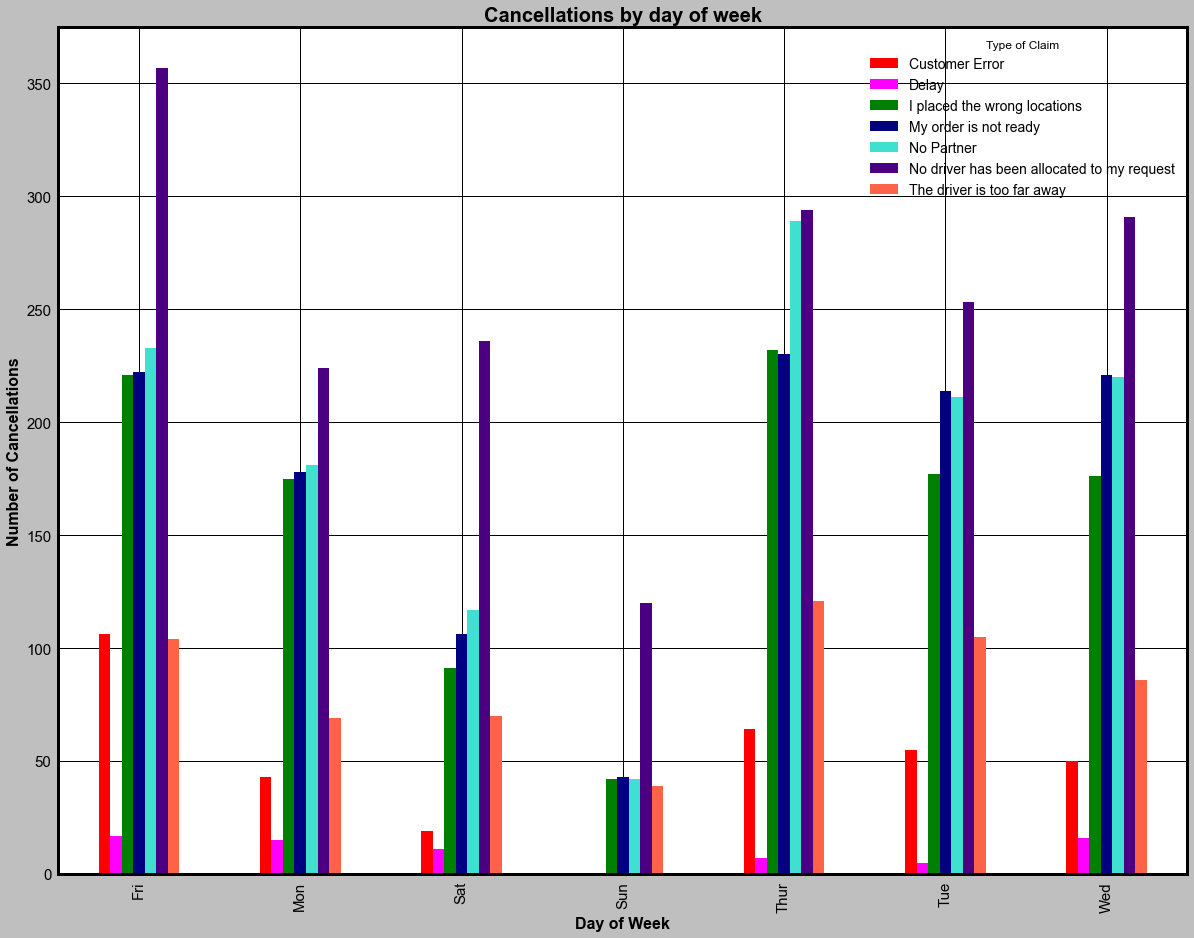

In [166]:
my_df= df[['Placement Day','Cancel Reason']].copy()
my_df['Placement Day'] = my_df['Placement Day'].map({1:'Mon',2:'Tue',3:'Wed',4:'Thur',5:'Fri',6:'Sat',7:'Sun'})
colors = ['red','magenta','green','navy','turquoise','indigo','tomato']
cancel_day = pd.pivot_table(data=my_df.groupby(['Placement Day'],sort=False)['Cancel Reason'].value_counts().reset_index(name='count').sort_values(by='count',ascending=False),index=['Placement Day'], columns='Cancel Reason',fill_value=0)
ax = cancel_day.plot(kind='bar',figsize=(16,12),fontsize=15,color=colors)

ax.set_title('Cancellations by day of week',fontsize=20,fontweight='bold')
ax.set_ylabel('Number of Cancellations',fontsize=16,fontweight='bold')
ax.set_xlabel('Day of Week',fontsize=16,fontweight='bold')

L=ax.legend(fontsize=14)
L.set_title('Type of Claim',prop={'size':12})
L.get_texts()[0].set_text('Customer Error')
L.get_texts()[1].set_text('Delay')
L.get_texts()[2].set_text('I placed the wrong locations')
L.get_texts()[3].set_text('My order is not ready')
L.get_texts()[4].set_text('No Partner')
L.get_texts()[5].set_text('No driver has been allocated to my request')
L.get_texts()[6].set_text('The driver is too far away')
plt.savefig('placement_day.png')

In [62]:
df['Cancellation Day'].value_counts(normalize=True) # most orders were cancelled on Friday

5.0    0.204439
4.0    0.185683
3.0    0.165052
2.0    0.163332
1.0    0.130041
6.0    0.103314
7.0    0.048140
Name: Cancellation Day, dtype: float64

In [57]:
df['Confirmation Day'].fillna(0).value_counts()

0.0    3516
4.0     587
5.0     555
2.0     523
3.0     498
1.0     423
6.0     227
7.0      69
Name: Confirmation Day, dtype: int64

In [63]:
filt = (df['Placement Day'] == df['Cancellation Day']) # these orders were the same day as they were placed
df['Same Day'] = filt

In [66]:
df['Same Day'].value_counts(normalize=True) # 93 % of orders were cancelled the same day they were placed

True     0.929666
False    0.070334
Name: Same Day, dtype: float64

In [68]:
df_same_day_cancel_grp = df.groupby(['Same Day'])
df_same_day_cancel_grp['Cancel Reason'].value_counts(normalize=True)

Same Day  Cancel Reason                              
False     No Partner                                     0.855556
          Customer error                                 0.046667
          No driver has been allocated to my request.    0.040000
          I placed the wrong locations.                  0.020000
          The driver is too far away.                    0.015556
          My order is not ready.                         0.013333
          Delay                                          0.008889
True      No driver has been allocated to my request.    0.295393
          My order is not ready.                         0.203093
          I placed the wrong locations.                  0.185777
          No Partner                                     0.152656
          The driver is too far away.                    0.098689
          Customer error                                 0.053127
          Delay                                          0.011264
Name: Cancel Reason, d

In [69]:
# orders that were cancelled on the same day
same_day_df = df[filt]
same_day_df['Same Day'].nunique()

1

In [79]:
same_day_df = same_day_df[['Placement Time','Cancellation Time']].apply(lambda x: pd.to_datetime(x,format='%H:%M:%S'))


In [80]:
same_day_df['Wait Time'] = same_day_df['Cancellation Time'] - same_day_df['Placement Time']

In [84]:
same_day_df['Wait Time'] = same_day_df['Wait Time'].dt.total_seconds()

In [86]:
same_day_df['Wait Time'].agg(['min','mean','median','max'])

min      -54053.000000
mean       2509.719401
median      698.000000
max       39669.000000
Name: Wait Time, dtype: float64

In [88]:
same_day_df[same_day_df['Wait Time'] < 0] # These rows have wrong data inputs. cancellation time before confirmation time

,Placement Time,Cancellation Time,Wait Time
792,1900-01-01 15:01:07,1900-01-01 00:00:14,-54053.0
2468,1900-01-01 10:33:37,1900-01-01 10:24:14,-563.0
3367,1900-01-01 15:34:40,1900-01-01 12:40:23,-10457.0


In [92]:
df.iloc[792]

Personal or Business          Business
Business Number                22996.0
Vehicle Type                      Bike
Standard or Express            Express
Platform                       desktop
Cancel Reason           Customer error
Cancelled by                     Staff
Placement Day                      1.0
Placement Time                15:01:07
Confirmation Day                   1.0
Confirmation Time             15:01:36
Cancellation Day                   1.0
Cancellation Time             00:00:14
Distance (KM)                      2.0
Pickup Lat                   -1.305607
Pickup Long                  36.771842
scheduled                     OnDemAND
Same Day                          True
Name: 792, dtype: object

##### New Day


In [18]:
cat_df.describe()

,Personal or Business,Business Number,Vehicle Type,Standard or Express,Platform,Cancel Reason,Cancelled by,Placement Day,Cancellation Day,scheduled
count,6398,3064.0,6398,6393,6398,6398,6398,6398.0,6398.0,6398
unique,2,220.0,2,2,5,7,2,7.0,7.0,2
top,Personal,20680.0,Bike,Express,android,No driver has been allocated to my request.,Customer,5.0,5.0,OnDemAND
freq,3334,627.0,6390,4013,2742,1775,4697,1260.0,1308.0,6151


In [21]:
cat_df['Cancel Reason'].value_counts(normalize=True)

No driver has been allocated to my request.    0.277430
No Partner                                     0.202094
My order is not ready.                         0.189747
I placed the wrong locations.                  0.174117
The driver is too far away.                    0.092842
Customer error                                 0.052673
Delay                                          0.011097
Name: Cancel Reason, dtype: float64